In [1]:
import Input_template
from Input_template import *

### Boundary  

In [3]:
district_boundary = "data/to_SPC_kallakurichi/Kallakurichi_District.shp"
taluk ="data/to_SPC_kallakurichi/Kallakurichi_Taluk.shp"

### Solar

In [5]:
theoritical = "data/Kallakurichi/solar/_rl_pr_tem_br_elev_rd_wat_com_rdpx_th/LC_Solar_final_area_mask_1_Kallakurichi.shp"
technical ="data/Kallakurichi/solar/_rl_pr_tem_br_elev_rd_wat_trans_ar_com_sub_rdpx_trsub_tech/LC_Solar_final_area_mask_1_Kallakurichi.shp"
high = "data/Kallakurichi/solar/_rl_pr_tem_br_elev_rd_wat_trans_ar_com_sub_rdpx_trsub_trat_subat_rdat_ir_high/LC_Solar_final_area_mask_1_Kallakurichi.shp"
med  = "data/Kallakurichi/solar/_rl_pr_tem_br_elev_rd_wat_trans_ar_com_sub_rdpx_trsub_trat_subat_rdat_ir_med/LC_Solar_final_area_mask_1_Kallakurichi.shp"

### Extra inputs

In [5]:
substations = "data/kallakurichi/list_substation_TN_corr.geojson/list_substation_TN_corr.shp"
railways = "data/kallakurichi/railway/Railways.shp"
powerlines = "data/kallakurichi/osm_powline_12.124301992294829_11.43735730765299_79.51368181527218_78.55045888340211.geojson"
cluster = "data/Kallakurichi/output_urban_cluster.shp"
roads = "data/Kallakurichi/output_osmroad_edges_12.124301992294829_11.43735730765299_79.51368181527218_78.55045888340211.geojson/edges.shp"

In [ ]:
shp_land_cover ="data/Kallakurichi/LULC/land_cover.shp" ## common ununsed

### Raster layers


In [7]:
slope = "data/Kallakurichi/DEM_T44_K_TN_proj32644_filled_slope.tif"
land_cover ="data/Kallakurichi/LC_w_urban_w_waterbod_proj32644.tif"

### Reserve forest shapefile

In [8]:
shp_RF = read_df_UT("workdir/extra_inputs/shp_RF/shp_RF.shp")

In [4]:
shp_district = read_df_UT(district_boundary)
shp_taluk = read_df_UT(taluk)

In [13]:
shp_solar_theo = read_df_UT(theoritical)
shp_solar_tech = read_df_UT(technical)
shp_solar_high =read_df_UT(high)
shp_solar_med = read_df_UT(med)
shp_roads = read_df_UT(roads)

In [14]:
print("theo:",shp_solar_theo.shape)
print("tech:",shp_solar_tech.shape)
print("high:",shp_solar_high.shape)
print("med:",shp_solar_med.shape)

theo: (78726, 12)
tech: (2027, 12)
high: (62, 32)
med: (445, 32)


In [16]:
shp_solar_theo = gpd.overlay(shp_district,shp_solar_theo,how ="intersection")
shp_solar_tech = gpd.overlay(shp_district,shp_solar_tech,how ="intersection")
shp_solar_high = gpd.overlay(shp_district,shp_solar_high,how ="intersection")
shp_solar_med  = gpd.overlay(shp_district,shp_solar_med,how ="intersection")

In [17]:
print("theo:",shp_solar_theo.shape)
print("tech:",shp_solar_tech.shape)
print("high:",shp_solar_high.shape)
print("med:",shp_solar_med.shape)

theo: (77169, 24)
tech: (1962, 24)
high: (61, 44)
med: (432, 44)


In [18]:
shp_solar_theo = gpd.overlay(shp_solar_theo,shp_RF,how ="difference")
shp_solar_tech = gpd.overlay(shp_solar_tech,shp_RF,how ="difference")
shp_solar_high = gpd.overlay(shp_solar_high,shp_RF,how ="difference")
shp_solar_med  = gpd.overlay(shp_solar_med,shp_RF,how ="difference")

In [19]:
print("theo:",shp_solar_theo.shape)
print("tech:",shp_solar_tech.shape)
print("high:",shp_solar_high.shape)
print("med:",shp_solar_med.shape)

theo: (76201, 24)
tech: (1926, 24)
high: (58, 44)
med: (424, 44)


In [21]:
shp_solar_theo = shp_solar_theo.explode()
shp_solar_tech = shp_solar_tech.explode()
shp_solar_high = shp_solar_high.explode()
shp_solar_med  = shp_solar_med.explode()

C:\Users\User\AppData\Local\Temp\ipykernel_1164\883173341.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  shp_solar_theo = shp_solar_theo.explode()
C:\Users\User\AppData\Local\Temp\ipykernel_1164\883173341.py:2: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  shp_solar_tech = shp_solar_tech.explode()
C:\Users\User\AppData\Local\Temp\ipykernel_1164\883173341.py:3: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  shp_solar_high = shp_solar_high.explode()
C:\Users\User

In [22]:
shp_solar_theo.reset_index(inplace =True,drop =True)
shp_solar_tech.reset_index(inplace =True,drop =True)
shp_solar_high.reset_index(inplace =True,drop =True)
shp_solar_med.reset_index(inplace =True,drop =True)

In [56]:
shp_solar_theo = add_area_and_class(shp_solar_theo)
shp_solar_tech = add_area_and_class(shp_solar_tech)
shp_solar_high = add_area_and_class(shp_solar_high)
shp_solar_med = add_area_and_class(shp_solar_med)

In [58]:
shp_solar_tech = shp_solar_tech[shp_solar_tech["area_class"] != "D"]
shp_solar_high = shp_solar_high[shp_solar_high["area_class"] == "C"]
shp_solar_med = shp_solar_med[(shp_solar_med["area_class"] != "D") & (shp_solar_med["area_class"] != "A")]

In [59]:
print("theo:",shp_solar_theo.shape)
print("tech:",shp_solar_tech.shape)
print("high:",shp_solar_high.shape)
print("med:",shp_solar_med.shape)

theo: (76574, 24)
tech: (1830, 24)
high: (40, 44)
med: (357, 44)


In [61]:
shp_solar_theo.reset_index(inplace =True,drop =True)
shp_solar_tech.reset_index(inplace =True,drop =True)
shp_solar_high.reset_index(inplace =True,drop =True)
shp_solar_med.reset_index(inplace =True,drop =True)

In [62]:
shp_solar_tech.area_class.value_counts()

A    1426
B     354
C      50
Name: area_class, dtype: int64

In [63]:
S1 = shp_solar_tech[shp_solar_tech["area_class"]=="A"]
S2 = shp_solar_tech[shp_solar_tech["area_class"]=="B"]
S3 = shp_solar_tech[shp_solar_tech["area_class"]=="C"]

In [64]:
S1.reset_index(inplace =True,drop =True)
S2.reset_index(inplace =True,drop =True)
S3.reset_index(inplace =True,drop =True)

In [65]:
# shp_solar_theo.to_file(get_in_workdir("solar/shp_solar_theo"))
# shp_solar_tech.to_file(get_in_workdir("solar/shp_solar_tech"))
# shp_solar_high.to_file(get_in_workdir("solar/shp_solar_high"))
# shp_solar_med.to_file(get_in_workdir("solar/shp_solar_med"))

In [66]:
# S1.to_file(get_in_workdir("solar/S1"))
# S2.to_file(get_in_workdir("solar/S2"))
# S3.to_file(get_in_workdir("solar/S3"))

### Extra_inputs

In [ ]:
shp_taluk = gpd.overlay(shp_district,shp_taluk,how ="intersection")
shp_taluk = add_area_and_class(shp_taluk)
shp_taluk.reset_index(inplace =True,drop =True)
# shp_taluk.to_file(get_in_workdir("extra_inputs/shp_taluk"))

In [6]:
shp_cluster = read_df_UT(cluster)
shp_cluster = gpd.overlay(shp_cluster,shp_district,how ="intersection")
# shp_cluster.to_file(get_in_workdir("extra_inputs/shp_cluster"))

In [ ]:
shp_roads = read_df_UT(roads)
shp_roads = gpd.overlay(shp_roads,shp_district,how ="intersection")
shp_roads_primary  = shp_roads[shp_roads["highway"]=="primary"]
shp_roads_secondary = shp_roads[shp_roads["highway"]=="secondary"]
shp_roads_primary.reset_index(inplace =True,drop =True)
shp_roads_secondary.reset_index(inplace =True,drop =True)
shp_roads_primary["Type"] = "Primary roads"
shp_roads_secondary["Type"] = "Secondary roads"
shp_roads_primary= shp_roads_primary[["Type","geometry"]]
shp_roads_secondary=shp_roads_secondary[["Type","geometry"]]
# shp_roads_primary.to_file(get_in_workdir("extra_inputs/shp_roads_primary"))
# shp_roads_secondary.to_file(get_in_workdir("extra_inputs/shp_roads_secondary"))

In [75]:
shp_powerlines = read_df_UT(powerlines)
shp_powerlines = gpd.overlay(shp_powerlines,shp_district,how="intersection")
# shp_powerlines.to_file(get_in_workdir("extra_inputs/shp_powerlines"))

In [23]:
shp_railways = read_df_UT(railways)
shp_railways = gpd.overlay(shp_railways,shp_district,how ="intersection")
shp_railways["Type"] = "Railway lines"
shp_railways = shp_railways[["Type","geometry"]]
# shp_railways.to_file(get_in_workdir("extra_inputs/shp_railways"))

In [24]:
shp_accessibilty = pd.concat([shp_roads_primary,shp_roads_secondary,shp_railways],ignore_index=True)
# shp_accessibilty.to_file(get_in_workdir("extra_inputs/shp_accessibilty"))

In [89]:
shp_substations = read_df_UT(substations)
shp_substations = gpd.overlay(shp_substations,shp_district,how ="intersection")
# shp_substations.to_file(get_in_workdir("extra_inputs/shp_substations"))

### Raster

In [55]:
slope = read_rastergdal_UT(slope)
land_cover = read_rastergdal_UT(land_cover)
GHI = read_rastergdal_UT(GHI)

In [56]:
UTMEPSG = 32644
shpgdf = shp_district
shpgdf =shpgdf.to_crs(epsg=UTMEPSG)

output ='D:\\Lila_Kallakuruchi\\workdir\\temp.shp'

LandUsefile_utm = slope

df2 = shpgdf

temp = LandUsefile_utm[:-4] + "_cut.tif"
# copy_raster(LandUsefile_utm,temp)
 
df = pd.DataFrame()   
for j in range(len(df2)):
    input_shp =  'D:\\Lila_Kallakuruchi\\workdir\\temp.shp'

    selection = df2.geometry[j:j+1]
    if selection.geometry.is_empty.bool():
        rasterarr = []
    else:
        selection.to_file(input_shp)

        input_raster= LandUsefile_utm

        output_raster = temp

        ds = gdal.Warp(output_raster,
                      input_raster,
                      format = 'GTiff',
                      cutlineDSName = input_shp,
                      cropToCutline=True,
                      )
        ds = None

In [57]:
UTMEPSG = 32644
shpgdf = shp_district
shpgdf =shpgdf.to_crs(epsg=UTMEPSG)

output ='D:\\Lila_Kallakuruchi\\workdir\\temp.shp'

LandUsefile_utm = land_cover

df2 = shpgdf

temp = LandUsefile_utm[:-4] + "_cut.tif"
# copy_raster(LandUsefile_utm,temp)
 
df = pd.DataFrame()   
for j in range(len(df2)):
    input_shp =  'D:\\Lila_Kallakuruchi\\workdir\\temp.shp'

    selection = df2.geometry[j:j+1]
    if selection.geometry.is_empty.bool():
        rasterarr = []
    else:
        selection.to_file(input_shp)

        #first for LandUse raster 
        input_raster= LandUsefile_utm

        output_raster = temp

        ds = gdal.Warp(output_raster,
                      input_raster,
                      format = 'GTiff',
                      cutlineDSName = input_shp,
                      cropToCutline=True,
                      )
        ds = None

### Changing the crs

In [ ]:
# raster_ds = land_cover
# target_crs = osr.SpatialReference()
# target_crs.ImportFromEPSG(4326) 
# output_ds = gdal.Warp("D:/Lila_Kallakuruchi/data/kallakurichi/land_cover_4326.tif", raster_ds, dstSRS=target_crs)
# raster_ds = None
# output_ds = None

In [ ]:
# raster_ds = slope
# target_crs = osr.SpatialReference()
# target_crs.ImportFromEPSG(4326) 
# output_ds = gdal.Warp("D:/Lila_Kallakuruchi/data/kallakurichi/slope_4326.tif", raster_ds, dstSRS=target_crs)
# raster_ds = None
# output_ds = None

## Forest

In [21]:
theoritical_f = "data/kallakurichi/forest/_ter_com_th/LC_Forest_final_mask_val_1_Kallakurichi.shp"
tech_f ="data/Kallakurichi/forest/_ter_com_ar_tech/LC_Forest_area_mask_1_Kallakurichi.shp"
high_f = "data/Kallakurichi/forest/_ter_fcor_elev_watpot_wtad_rdad_urad_com_ar_high/LC_Forest_area_mask_1_Kallakurichi.shp"
med_f = "data/Kallakurichi/forest/_ter_elev_watpot_wtad_rdad_urad_com_ar_med/LC_Forest_area_mask_1_Kallakurichi.shp"

In [22]:
shp_forest_theo = read_df_UT(theoritical_f)
shp_forest_tech = read_df_UT(tech_f)
shp_forest_high =read_df_UT(high_f)
shp_forest_med = read_df_UT(med_f)

In [23]:
print("theo:",shp_forest_theo.shape)
print("tech:",shp_forest_tech.shape)
print("high:",shp_forest_high.shape)
print("med:",shp_forest_med.shape)

theo: (101577, 8)
tech: (5257, 8)
high: (803, 5)
med: (1074, 5)


In [24]:
shp_forest_theo = gpd.overlay(shp_district,shp_forest_theo,how ="intersection")
shp_forest_tech = gpd.overlay(shp_district,shp_forest_tech,how ="intersection")
shp_forest_high = gpd.overlay(shp_district,shp_forest_high,how ="intersection")
shp_forest_med  = gpd.overlay(shp_district,shp_forest_med,how ="intersection")

In [25]:
print("theo:",shp_forest_theo.shape)
print("tech:",shp_forest_tech.shape)
print("high:",shp_forest_high.shape)
print("med:",shp_forest_med.shape)

theo: (99907, 20)
tech: (5140, 20)
high: (790, 17)
med: (1059, 17)


In [26]:
shp_forest_theo = add_area_and_class_forest(shp_forest_theo)
shp_forest_tech = add_area_and_class_forest(shp_forest_tech)
shp_forest_high = add_area_and_class_forest(shp_forest_high)
shp_forest_med = add_area_and_class_forest(shp_forest_med)

In [28]:
shp_forest_tech = shp_forest_tech[shp_forest_tech["area_acres"] > 1 ]
shp_forest_high = shp_forest_high[shp_forest_high["area_acres"] > 1 ]
shp_forest_med = shp_forest_med[shp_forest_med["area_acres"] > 1 ]

In [29]:
print("theo:",shp_forest_theo.shape)
print("tech:",shp_forest_tech.shape)
print("high:",shp_forest_high.shape)
print("med:",shp_forest_med.shape)

theo: (99907, 20)
tech: (5116, 20)
high: (785, 19)
med: (1054, 19)


In [30]:
shp_forest_theo.reset_index(inplace =True,drop =True)
shp_forest_tech.reset_index(inplace =True,drop =True)
shp_forest_high.reset_index(inplace =True,drop =True)
shp_forest_med.reset_index(inplace =True,drop =True)

In [32]:
# shp_forest_theo.to_file(get_in_workdir("forest/shp_forest_theo"))
# shp_forest_tech.to_file(get_in_workdir("forest/shp_forest_tech"))
# shp_forest_high.to_file(get_in_workdir("forest/shp_forest_high"))
# shp_forest_med.to_file(get_in_workdir("forest/shp_forest_med"))

In [33]:
S1 = shp_forest_tech[shp_forest_tech["area_class"]=="A"]
S2 = shp_forest_tech[shp_forest_tech["area_class"]=="B"]
S3 = shp_forest_tech[shp_forest_tech["area_class"]=="C"]

In [34]:
S1.reset_index(inplace =True,drop =True)
S2.reset_index(inplace =True,drop =True)
S3.reset_index(inplace =True,drop =True)

In [35]:
# S1.to_file(get_in_workdir("forest/S1"))
# S2.to_file(get_in_workdir("forest/S2"))
# S3.to_file(get_in_workdir("forest/S3"))

## Water

In [7]:
high_w = "data/Kallakurichi/water/water/_run_wd_lith_Fin_high/LC_Water_final.shp"
med_w = "data/Kallakurichi/water/water/_run_wd_lith_Fin_med/LC_Water_final.shp"
low_w = "data/Kallakurichi/water/water/_run_wd_lith_Fin_low/LC_Water_final.shp"

In [8]:
gw_high = read_df_UT("data/Kallakurichi/water/water/_run_wd_lith_Fin_high/LC_Water_final_groundwaterrecharge_mask_val_1.shp")
sw_high = read_df_UT(("data/Kallakurichi/water/water/_run_wd_lith_Fin_high/LC_Water_final_surfacewaterbod_mask_val_1.shp"))

In [9]:
sw_med = read_df_UT(("data/Kallakurichi/water/water/_run_wd_lith_Fin_med/LC_Water_final_surfacewaterbod_mask_val_1.shp"))
gw_med =  read_df_UT(("data/Kallakurichi/water/water/_run_wd_lith_Fin_med/LC_Water_final_groundwaterrecharge_mask_val_1.shp"))

In [10]:
sw_low = read_df_UT(("data/Kallakurichi/water/water/_run_wd_lith_Fin_low/LC_Water_final_surfacewaterbod_mask_val_1.shp"))
gw_low =  read_df_UT(("data/Kallakurichi/water/water/_run_wd_lith_Fin_low/LC_Water_final_groundwaterrecharge_mask_val_1.shp"))

In [11]:
print("gw_high:",gw_high.shape)

print("sw_high:",sw_high.shape)

print("sw_med:",sw_med.shape)
print("gw_med:",gw_med.shape)
print("sw_low:",sw_low.shape)
print("gw_low:",gw_low.shape)

gw_high: (15, 3)
sw_high: (152, 3)
sw_med: (2347, 3)
gw_med: (103, 3)
sw_low: (11348, 3)
gw_low: (666, 3)


In [15]:
gw_high = gpd.overlay(shp_district,gw_high,how ="intersection")
sw_high = gpd.overlay(shp_district,sw_high,how ="intersection")
sw_med = gpd.overlay(shp_district,sw_med,how ="intersection")
gw_med  = gpd.overlay(shp_district,gw_med,how ="intersection")
sw_low = gpd.overlay(shp_district,sw_low,how ="intersection")
gw_low  = gpd.overlay(shp_district,gw_low,how ="intersection")

In [16]:
print("gw_high:",gw_high.shape)
print("sw_high:",sw_high.shape)
print("sw_med:",sw_med.shape)
print("gw_med:",gw_med.shape)
print("sw_low:",sw_low.shape)
print("gw_low:",gw_low.shape)

gw_high: (3, 15)
sw_high: (75, 15)
sw_med: (1266, 15)
gw_med: (2, 15)
sw_low: (5295, 15)
gw_low: (128, 15)


In [23]:
sw_high.reset_index(inplace =True,drop =True)
sw_med.reset_index(inplace =True,drop =True)
gw_med.reset_index(inplace =True,drop =True)
sw_low.reset_index(inplace =True,drop =True)
gw_low.reset_index(inplace =True,drop =True)

In [24]:
gw_high.reset_index(inplace =True,drop =True)

In [25]:
sw_tech = pd.concat([sw_low, sw_med, sw_high], ignore_index=True)
gw_tech = pd.concat([gw_low, gw_med,gw_high], ignore_index=True)

In [40]:
gw_high.to_file(get_in_workdir("water/gw_high"))

In [26]:
# sw_tech.to_file(get_in_workdir("water/sw_tech"))
# gw_tech.to_file(get_in_workdir("water/gw_tech"))
# sw_high.to_file(get_in_workdir("water/sw_high"))
# sw_med.to_file(get_in_workdir("water/sw_med"))
# gw_med.to_file(get_in_workdir("water/gw_med"))
# sw_low.to_file(get_in_workdir("water/sw_low"))
# gw_low.to_file(get_in_workdir("water/gw_low"))

In [17]:
shp_water_high = read_df_UT(high_w)
shp_water_med = read_df_UT(med_w)
shp_water_low = read_df_UT(low_w)

In [18]:
print("high:",shp_water_high.shape)
print("med:",shp_water_med.shape)
print("low:",shp_water_low.shape)

high: (169, 34)
med: (2535, 34)
low: (13833, 34)


In [19]:
shp_water_high = gpd.overlay(shp_district,shp_water_high,how ="intersection")
shp_water_med = gpd.overlay(shp_district,shp_water_med,how ="intersection")
shp_water_low  = gpd.overlay(shp_district,shp_water_low,how ="intersection")

In [20]:
print("high:",shp_water_high.shape)
print("med:",shp_water_med.shape)
print("low:",shp_water_low.shape)

high: (76, 46)
med: (1307, 46)
low: (5924, 46)


In [21]:
shp_water_high.reset_index(inplace =True,drop =True)
shp_water_med.reset_index(inplace =True,drop =True)
shp_water_low.reset_index(inplace =True,drop =True)

In [22]:
shp_water_tech = pd.concat([shp_water_high, shp_water_med, shp_water_low], ignore_index=True)

In [23]:
shp_water_tech = add_area_and_class(shp_water_tech)
shp_water_high = add_area_and_class(shp_water_high)
shp_water_med = add_area_and_class(shp_water_med)
shp_water_low = add_area_and_class(shp_water_low)

In [24]:
# shp_water_tech.to_file(get_in_workdir("water/shp_water_tech"))
# shp_water_high.to_file(get_in_workdir("water/shp_water_high"))
# shp_water_med.to_file(get_in_workdir("water/shp_water_med"))
# shp_water_low.to_file(get_in_workdir("water/shp_water_low"))

## Agri

In [34]:
theoritical_a = "data/kallakurichi/agri_1/_pr_tem_br_com_th/LC_agri_final_mask_val_1_Kallakurichi.shp"
tech_a ="data/Kallakurichi/agri_1/_pr_tem_br_elev_rd_ar_com_tech/LC_agri_final_area_mask_1_Kallakurichi.shp"
high_a = "data/Kallakurichi/agri_1/_pr_tem_br_elev_rd_ar_com_wat_er_high/LC_agri_final_area_mask_1_Kallakurichi.shp"
med_a = "data/Kallakurichi/agri_1/_pr_tem_br_elev_rd_ar_com_wat_er_med/LC_agri_final_area_mask_1_Kallakurichi.shp"

In [35]:
shp_agri_theo = read_df_UT(theoritical_a)
shp_agri_tech = read_df_UT(tech_a)
shp_agri_high =read_df_UT(high_a)
shp_agri_med = read_df_UT(med_a)

In [36]:
print("theo:",shp_agri_theo.shape)
print("tech:",shp_agri_tech.shape)
print("high:",shp_agri_high.shape)
print("med:",shp_agri_med.shape)

theo: (73027, 8)
tech: (11035, 8)
high: (3305, 13)
med: (3892, 13)


In [37]:
shp_agri_theo = gpd.overlay(shp_district,shp_agri_theo,how ="intersection")
shp_agri_tech = gpd.overlay(shp_district,shp_agri_tech,how ="intersection")
shp_agri_high = gpd.overlay(shp_district,shp_agri_high,how ="intersection")
shp_agri_med  = gpd.overlay(shp_district,shp_agri_med,how ="intersection")

In [38]:
print("theo:",shp_agri_theo.shape)
print("tech:",shp_agri_tech.shape)
print("high:",shp_agri_high.shape)
print("med:",shp_agri_med.shape)

theo: (71376, 20)
tech: (10754, 20)
high: (3208, 25)
med: (3778, 25)


In [39]:
# shp_agri_theo = gpd.overlay(shp_agri_theo,shp_RF,how ="difference")
# shp_agri_tech = gpd.overlay(shp_agri_tech,shp_RF,how ="difference")
# shp_agri_high = gpd.overlay(shp_agri_high,shp_RF,how ="difference")
# shp_agri_med  = gpd.overlay(shp_agri_med,shp_RF,how ="difference")

In [40]:
# print("theo:",shp_agri_theo.shape)
# print("tech:",shp_agri_tech.shape)
# print("high:",shp_agri_high.shape)
# print("med:",shp_agri_med.shape)

In [41]:
# shp_agri_theo = shp_agri_theo.explode()
# shp_agri_tech = shp_agri_tech.explode()
# shp_agri_high = shp_agri_high.explode()
# shp_agri_med  = shp_agri_med.explode()

In [42]:
shp_agri_theo.reset_index(inplace =True,drop =True)
shp_agri_tech.reset_index(inplace =True,drop =True)
shp_agri_high.reset_index(inplace =True,drop =True)
shp_agri_med.reset_index(inplace =True,drop =True)

In [43]:
shp_agri_theo = add_area_and_class_agri(shp_agri_theo)
shp_agri_tech = add_area_and_class_agri(shp_agri_tech)
shp_agri_high = add_area_and_class_agri(shp_agri_high)
shp_agri_med = add_area_and_class_agri(shp_agri_med)

In [44]:
print("theo:",shp_agri_theo.shape)
print("tech:",shp_agri_tech.shape)
print("high:",shp_agri_high.shape)
print("med:",shp_agri_med.shape)

theo: (71376, 20)
tech: (10754, 20)
high: (3208, 25)
med: (3778, 25)


In [45]:
shp_agri_tech = shp_agri_tech[shp_agri_tech["area_acres"] > 1 ]
shp_agri_high = shp_agri_high[shp_agri_high["area_acres"] > 1 ]
shp_agri_med = shp_agri_med[shp_agri_med["area_acres"] > 1 ]

In [46]:
shp_agri_theo.reset_index(inplace =True,drop =True)
shp_agri_tech.reset_index(inplace =True,drop =True)
shp_agri_high.reset_index(inplace =True,drop =True)
shp_agri_med.reset_index(inplace =True,drop =True)

In [47]:
print("theo:",shp_agri_theo.shape)
print("tech:",shp_agri_tech.shape)
print("high:",shp_agri_high.shape)
print("med:",shp_agri_med.shape)

theo: (71376, 20)
tech: (10701, 20)
high: (3192, 25)
med: (3760, 25)


In [48]:
shp_agri_theo.to_file(get_in_workdir("agri/shp_agri_theo"))
shp_agri_tech.to_file(get_in_workdir("agri/shp_agri_tech"))
shp_agri_high.to_file(get_in_workdir("agri/shp_agri_high"))
shp_agri_med.to_file(get_in_workdir("agri/shp_agri_med"))

In [49]:
S1 = shp_agri_tech[shp_agri_tech["area_class"]=="A"]
S2 = shp_agri_tech[shp_agri_tech["area_class"]=="B"]
S3 = shp_agri_tech[shp_agri_tech["area_class"]=="C"]

In [50]:
S1.reset_index(inplace =True,drop =True)
S2.reset_index(inplace =True,drop =True)
S3.reset_index(inplace =True,drop =True)

In [51]:
S1.to_file(get_in_workdir("agri/S1"))
S2.to_file(get_in_workdir("agri/S2"))
S3.to_file(get_in_workdir("agri/S3"))

## Industry

In [13]:
theoritical_i = "data/Kallakurichi/industry/_pr_tem_br_elev_wat_com_rdpx_th/LC_industry_final_area_mask_1_Kallakurichi.shp"
tech_i ="data/Kallakurichi/industry/_ur_pr_tem_br_elev_wat_ar_com_rdpx_tech/LC_industry_final_area_mask_1_Kallakurichi.shp"
high_i = "data/Kallakurichi/industry/_ur_pr_tem_br_elev_wat_ar_com_rdpx_rdat_urad_high/LC_industry_final_area_mask_1_Kallakurichi.shp"
med_i = "data/Kallakurichi/industry/_ur_pr_tem_br_elev_wat_ar_com_rdpx_rdat_urad_med/LC_industry_final_area_mask_1_Kallakurichi.shp"

In [9]:
# theoritical_new = "data/Kallakurichi/industry/industry_5kmfrom_Protectedareas/_pr_tem_br_elev_wat_com_rdpx_th/LC_industry_final_area_mask_1_Kallakurichi.shp"
# tech_new ="data/Kallakurichi/industry/industry_5kmfrom_Protectedareas/_ur_pr_tem_br_elev_wat_ar_com_rdpx_tech/LC_industry_final_area_mask_1_Kallakurichi.shp"
# high_new = "data/Kallakurichi/industry/industry_5kmfrom_Protectedareas/_ur_pr_tem_br_elev_wat_ar_com_rdpx_rdat_urad_high/LC_industry_final_area_mask_1_Kallakurichi.shp"
# med_new = "data/Kallakurichi/industry/industry_5kmfrom_Protectedareas/_ur_pr_tem_br_elev_wat_ar_com_rdpx_rdat_urad_med/LC_industry_final_area_mask_1_Kallakurichi.shp"

In [14]:
shp_indus_theo = read_df_UT(theoritical_i)
shp_indus_tech = read_df_UT(tech_i)
shp_indus_high =read_df_UT(high_i)
shp_indus_med = read_df_UT(med_i)

In [15]:
print("theo:",shp_indus_theo.shape)
print("tech:",shp_indus_tech.shape)
print("high:",shp_indus_high.shape)
print("med:",shp_indus_med.shape)

theo: (8290, 10)
tech: (3605, 10)
high: (3475, 18)
med: (104, 18)


In [17]:
shp_indus_theo.area_acres.sum()

8824.448492428019

In [18]:
shp_indus_tech.area_acres.sum()

8201.822578089517

In [19]:
shp_indus_theo = gpd.overlay(shp_district,shp_indus_theo,how ="intersection")
shp_indus_tech = gpd.overlay(shp_district,shp_indus_tech,how ="intersection")
shp_indus_high = gpd.overlay(shp_district,shp_indus_high,how ="intersection")
shp_indus_med  = gpd.overlay(shp_district,shp_indus_med,how ="intersection")

In [20]:
shp_indus_theo.reset_index(inplace =True,drop =True)
shp_indus_tech.reset_index(inplace =True,drop =True)
shp_indus_high.reset_index(inplace =True,drop =True)
shp_indus_med.reset_index(inplace =True,drop =True)

In [21]:
print("theo:",shp_indus_theo.shape)
print("tech:",shp_indus_tech.shape)
print("high:",shp_indus_high.shape)
print("med:",shp_indus_med.shape)

theo: (8041, 22)
tech: (3499, 22)
high: (3374, 30)
med: (102, 30)


In [22]:
shp_indus_theo = add_area_and_class_industry(shp_indus_theo)
shp_indus_tech = add_area_and_class_industry(shp_indus_tech)
shp_indus_high = add_area_and_class_industry(shp_indus_high)
shp_indus_med = add_area_and_class_industry(shp_indus_med)

In [23]:
shp_indus_tech = shp_indus_tech[shp_indus_tech["area_acres"] > 0.3 ]
shp_indus_high = shp_indus_high[shp_indus_high["area_acres"] > 0.3 ]
shp_indus_med = shp_indus_med[shp_indus_med["area_acres"] > 0.3 ]

In [24]:
shp_indus_theo.reset_index(inplace =True,drop =True)
shp_indus_tech.reset_index(inplace =True,drop =True)
shp_indus_high.reset_index(inplace =True,drop =True)
shp_indus_med.reset_index(inplace =True,drop =True)

In [23]:
# shp_indus_theo.to_file(get_in_workdir("industry/shp_industry_theo"))
# shp_indus_tech.to_file(get_in_workdir("industry/shp_industry_tech"))
# shp_indus_high.to_file(get_in_workdir("industry/shp_industry_high"))
# shp_indus_med.to_file(get_in_workdir("industry/shp_industry_med"))

In [24]:
S1 = shp_indus_tech[shp_indus_tech["area_class"]=="A"]
S2 = shp_indus_tech[shp_indus_tech["area_class"]=="B"]
S3 = shp_indus_tech[shp_indus_tech["area_class"]=="C"]

In [25]:
S1.reset_index(inplace =True,drop =True)
S2.reset_index(inplace =True,drop =True)
S3.reset_index(inplace =True,drop =True)

<AxesSubplot: >

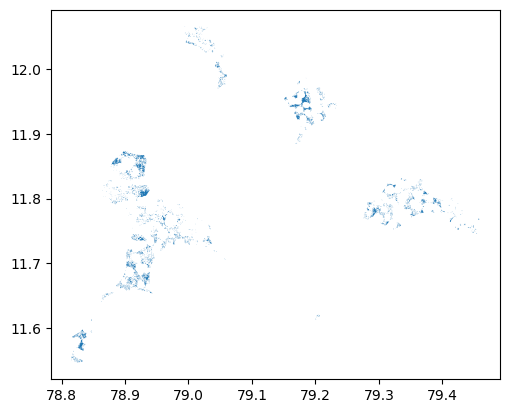

In [26]:
shp_indus_tech.plot()

In [27]:
# S1.to_file(get_in_workdir("industry/S1"))
# S2.to_file(get_in_workdir("industry/S2"))
# S3.to_file(get_in_workdir("industry/S3"))

## Housing

In [28]:
theoritical_h = "data/Kallakurichi/residential/_rl_pr_tem_br_elev_rd_wat_com_th/LC_residential_final_mask_val_1_Kallakurichi.shp"
tech_h ="data/Kallakurichi/residential/_ur_rl_pr_tem_br_elev_rd_wat_ar_com_rdpx_tech/LC_residential_final_area_mask_1_Kallakurichi.shp"
high_h = "data/Kallakurichi/residential/_ur_rl_pr_tem_br_elev_rd_wat_ar_com_rdpx_rdat_urad_high/LC_residential_final_area_mask_1_Kallakurichi.shp"
med_h = "data/Kallakurichi/residential/_ur_rl_pr_tem_br_elev_rd_wat_ar_com_rdpx_rdat_urad_med/LC_residential_final_area_mask_1_Kallakurichi.shp"

In [29]:
shp_housing_theo = read_df_UT(theoritical_h)
shp_housing_tech = read_df_UT(tech_h)
shp_housing_high =read_df_UT(high_h)
shp_housing_med = read_df_UT(med_h)

In [30]:
print("theo:",shp_housing_theo.shape)
print("tech:",shp_housing_tech.shape)
print("high:",shp_housing_high.shape)
print("med:",shp_housing_med.shape)

theo: (35312, 8)
tech: (3756, 10)
high: (111, 18)
med: (292, 18)


In [31]:
shp_housing_theo = gpd.overlay(shp_district,shp_housing_theo,how ="intersection")
shp_housing_tech = gpd.overlay(shp_district,shp_housing_tech,how ="intersection")
shp_housing_high = gpd.overlay(shp_district,shp_housing_high,how ="intersection")
shp_housing_med  = gpd.overlay(shp_district,shp_housing_med,how ="intersection")

In [32]:
print("theo:",shp_housing_theo.shape)
print("tech:",shp_housing_tech.shape)
print("high:",shp_housing_high.shape)
print("med:",shp_housing_med.shape)

theo: (34656, 20)
tech: (3741, 22)
high: (111, 30)
med: (292, 30)


In [33]:
shp_housing_theo = add_area_and_class_housing(shp_housing_theo)
shp_housing_tech = add_area_and_class_housing(shp_housing_tech)
shp_housing_high = add_area_and_class_housing(shp_housing_high)
shp_housing_med = add_area_and_class_housing(shp_housing_med)

In [34]:
shp_housing_tech = shp_housing_tech[shp_housing_tech["area_acres"] > 0.25 ]
shp_housing_high = shp_housing_high[shp_housing_high["area_acres"] > 5 ]
shp_housing_med = shp_housing_med[shp_housing_med["area_acres"] > 2 ]

In [35]:
shp_housing_theo.reset_index(inplace =True,drop =True)
shp_housing_tech.reset_index(inplace =True,drop =True)
shp_housing_high.reset_index(inplace =True,drop =True)
shp_housing_med.reset_index(inplace =True,drop =True)

In [36]:
# shp_housing_theo.to_file(get_in_workdir("housing/shp_housing_theo"))
# shp_housing_tech.to_file(get_in_workdir("housing/shp_housing_tech"))
# shp_housing_high.to_file(get_in_workdir("housing/shp_housing_high"))
# shp_housing_med.to_file(get_in_workdir("housing/shp_housing_med"))

In [37]:
S1 = shp_housing_tech[shp_housing_tech["area_class"]=="A"]
S2 = shp_housing_tech[shp_housing_tech["area_class"]=="B"]
S3 = shp_housing_tech[shp_housing_tech["area_class"]=="C"]

In [38]:
S1.reset_index(inplace =True,drop =True)
S2.reset_index(inplace =True,drop =True)
S3.reset_index(inplace =True,drop =True)

In [39]:
# S1.to_file(get_in_workdir("housing/S1"))
# S2.to_file(get_in_workdir("housing/S2"))
# S3.to_file(get_in_workdir("housing/S3"))

## Land_cover

In [3]:
shp_land_cover = read_df_UT(shp_land_cover) ## common
shp_land_cover = gpd.overlay(shp_district,shp_land_cover,how ="intersection")

NameError: name 'read_df_UT' is not defined

In [14]:
# shp_land_cover.to_file(get_in_workdir("extra_inputs/Landcover"))

In [49]:
shp_unused = shp_land_cover[shp_land_cover["DN"]==1]
shp_sparseveg = shp_land_cover[shp_land_cover["DN"]==2]
shp_cropland = shp_land_cover[shp_land_cover["DN"]==3]
shp_forest = shp_land_cover[shp_land_cover["DN"]==4]
shp_water = shp_land_cover[shp_land_cover["DN"]==5]
shp_builtup = shp_land_cover[shp_land_cover["DN"]==6]
shp_access = shp_land_cover[shp_land_cover["DN"]==7]
shp_waterbodies = shp_land_cover[shp_land_cover["DN"]==50]

In [51]:
shp_unused.reset_index(inplace =True,drop =True)
shp_sparseveg.reset_index(inplace =True,drop =True)
shp_cropland.reset_index(inplace =True,drop =True)
shp_forest.reset_index(inplace =True,drop =True)
shp_water.reset_index(inplace =True,drop =True)
shp_builtup.reset_index(inplace =True,drop =True)
shp_access.reset_index(inplace =True,drop =True)
shp_waterbodies.reset_index(inplace =True,drop =True)

In [52]:
# shp_unused.to_file(get_in_workdir("extra_inputs/shp_unused"))
# shp_sparseveg.to_file(get_in_workdir("extra_inputs/shp_sparseveg"))
# shp_cropland.to_file(get_in_workdir("extra_inputs/shp_cropland"))
# shp_forest.to_file(get_in_workdir("extra_inputs/shp_forest"))
# shp_water.to_file(get_in_workdir("extra_inputs/shp_water"))
# shp_builtup.to_file(get_in_workdir("extra_inputs/shp_builtup"))
# shp_access.to_file(get_in_workdir("extra_inputs/shp_access"))
# shp_waterbodies.to_file(get_in_workdir("extra_inputs/shp_waterbodies"))

### 2021 landcover shape file

In [14]:
shp_land_cover = read_df_UT("workdir/extra_inputs/shp_landcover/shp_landcover.shp")

In [15]:
shp_land_cover.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
shp_land_cover.DN.value_counts()

1    125484
2    118354
3     78219
4     59545
7     37498
6      6819
5      4513
0       456
Name: DN, dtype: int64

In [19]:
shp_unused = shp_land_cover[shp_land_cover["DN"]==1]
shp_sparseveg = shp_land_cover[shp_land_cover["DN"]==2]
shp_cropland = shp_land_cover[shp_land_cover["DN"]==3]
shp_forest = shp_land_cover[shp_land_cover["DN"]==4]
shp_water_bodies = shp_land_cover[shp_land_cover["DN"]==5]
shp_builtup = shp_land_cover[shp_land_cover["DN"]==6]
shp_access = shp_land_cover[shp_land_cover["DN"]==7]

In [21]:
shp_unused.reset_index(inplace =True,drop =True)
shp_sparseveg.reset_index(inplace =True,drop =True)
shp_cropland.reset_index(inplace =True,drop =True)
shp_forest.reset_index(inplace =True,drop =True)
shp_water_bodies.reset_index(inplace =True,drop =True)
shp_builtup.reset_index(inplace =True,drop =True)
shp_access.reset_index(inplace =True,drop =True)

In [23]:
# shp_unused.to_file(get_in_workdir("extra_inputs/shp_unused"))
# shp_sparseveg.to_file(get_in_workdir("extra_inputs/shp_sparseveg"))
# shp_cropland.to_file(get_in_workdir("extra_inputs/shp_cropland"))
# shp_forest.to_file(get_in_workdir("extra_inputs/shp_forest"))
# shp_water_bodies.to_file(get_in_workdir("extra_inputs/shp_water_bodies"))
# shp_builtup.to_file(get_in_workdir("extra_inputs/shp_builtup"))
# shp_access.to_file(get_in_workdir("extra_inputs/shp_access"))

## landcover 2020

In [56]:
# shp_unused_20 = read_df_UT("land_cover_20/unused/unused.shp")
# shp_sparseveg_20 = read_df_UT("land_cover_20/sparseveg/sparseveg.shp")
# shp_cropland_20 = read_df_UT("land_cover_20/cropland/cropland.shp")
# shp_forest_20 = read_df_UT("land_cover_20/treecover/treecover.shp")
# shp_water_bodies_20 = read_df_UT("land_cover_20/waterbodies/waterbodies.shp")
# shp_builtup_20 = read_df_UT("land_cover_20/builtup/builtup.shp")
# shp_access_20 =read_df_UT("land_cover_20/roads/roads.shp")

In [57]:
# shp_unused_20 = shp_unused_20[shp_unused_20["DN"]==1]
# shp_sparseveg_20 = shp_sparseveg_20[shp_sparseveg_20["DN"]==2]
# shp_cropland_20 = shp_cropland_20[shp_cropland_20["DN"]==3]
# shp_forest_20 = shp_forest_20[shp_forest_20["DN"]==4]
# shp_water_bodies_20 = shp_water_bodies_20[shp_water_bodies_20["DN"]==5]
# shp_builtup_20 = shp_builtup_20[shp_builtup_20["DN"]==6]
# shp_access_20 = shp_access_20[shp_access_20["DN"]==7]

In [59]:
# shp_unused_20.reset_index(inplace =True,drop =True)
# shp_sparseveg_20.reset_index(inplace =True,drop =True)
# shp_cropland_20.reset_index(inplace =True,drop =True)
# shp_forest_20.reset_index(inplace =True,drop =True)
# shp_water_bodies_20.reset_index(inplace =True,drop =True)
# shp_builtup_20.reset_index(inplace =True,drop =True)
# shp_access_20.reset_index(inplace =True,drop =True)

In [60]:
# shp_unused_20 = add_area_and_class(shp_unused_20)

In [61]:
# shp_sparseveg_20 = add_area_and_class(shp_sparseveg_20)
# shp_cropland_20 = add_area_and_class(shp_cropland_20)
# shp_forest_20 = add_area_and_class(shp_forest_20)
# shp_water_bodies_20 = add_area_and_class(shp_water_bodies_20)
# shp_builtup_20 = add_area_and_class(shp_builtup_20)
# shp_access_20 = add_area_and_class(shp_access_20)

In [63]:
# shp_unused_20 = shp_unused_20[shp_unused_20["area_acres"] > 1]
# shp_sparseveg_20 = shp_sparseveg_20[shp_sparseveg_20["area_acres"]> 1]
# shp_cropland_20 = shp_cropland_20[shp_cropland_20["area_acres"]>1]
# shp_forest_20 = shp_forest_20[shp_forest_20["area_acres"]>1]
# shp_water_bodies_20 = shp_water_bodies_20[shp_water_bodies_20["area_acres"]>1]
# shp_builtup_20 = shp_builtup_20[shp_builtup_20["area_acres"]>1]
# shp_access_20 = shp_access_20[shp_access_20["area_acres"]>1]

In [66]:
# shp_unused_20.reset_index(inplace =True,drop =True)
# shp_sparseveg_20.reset_index(inplace =True,drop =True)
# shp_cropland_20.reset_index(inplace =True,drop =True)
# shp_forest_20.reset_index(inplace =True,drop =True)
# shp_water_bodies_20.reset_index(inplace =True,drop =True)
# shp_builtup_20.reset_index(inplace =True,drop =True)
# shp_access_20.reset_index(inplace =True,drop =True)

In [67]:
# shp_unused_20.to_file(get_in_workdir("raster/shp_unused_20"))
# shp_sparseveg_20.to_file(get_in_workdir("raster/shp_sparseveg_20"))
# shp_cropland_20.to_file(get_in_workdir("raster/shp_cropland_20"))
# shp_forest_20.to_file(get_in_workdir("raster/shp_forest_20"))
# shp_water_bodies_20.to_file(get_in_workdir("raster/shp_water_bodies_20"))
# shp_builtup_20.to_file(get_in_workdir("raster/shp_builtup_20"))
# shp_access_20.to_file(get_in_workdir("raster/shp_access_20"))